# Model building on Wine Quality Dataset

# Problem Statement : 

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

# Feature Information :

1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [119]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [120]:
# loading and reading data
dataset = pd.read_csv('winequality.csv')
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Exploratory Data Analysis

In [121]:
# total number of records
dataset.shape

(6497, 13)

OBSERVATIONS : There are 6497 rows and 13 columns

In [122]:
# copying the dataset
df = dataset.copy()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


OBSERVATIONS : here we can clearly see there are 12 Numerical Features and 1 Categorical Features

In [124]:
# Converting Type Feature to Categorical feature
df['type'].unique()

array(['white', 'red'], dtype=object)

In [125]:
df['type'] = df['type'].map({'white' : 0, 'red' : 1})

OBSERVATIONS : Here we mapped the type feature with 'white' : 0 and  'red' : 1

In [126]:
df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


OBSERVATIONS : Now All Features are Numerical

In [128]:
# checking for duplicate records
df.duplicated().sum()

1168

In [129]:
# dropping duplicated rows
df.drop_duplicates(inplace=True)

In [130]:
df.reset_index(inplace = True,drop = True)

In [131]:
df.duplicated().sum()

0

In [132]:
# total number of records after dropping Duplicates
df.shape

(5329, 13)

In [133]:
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
5,0,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6
6,0,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5
7,0,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5
8,0,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5
9,0,6.6,0.16,0.40,1.50,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7


In [134]:
# Checking Null Values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [135]:
# Displaying all null rows
df[df.isnull().any(axis=1)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,0,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
29,0,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6
48,0,6.8,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,6
76,0,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6
86,0,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.1,4
120,0,8.1,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,6
149,0,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5
192,0,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6
212,0,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
227,0,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5


OBSERVATIONS : These are the records with missing values

<AxesSubplot:>

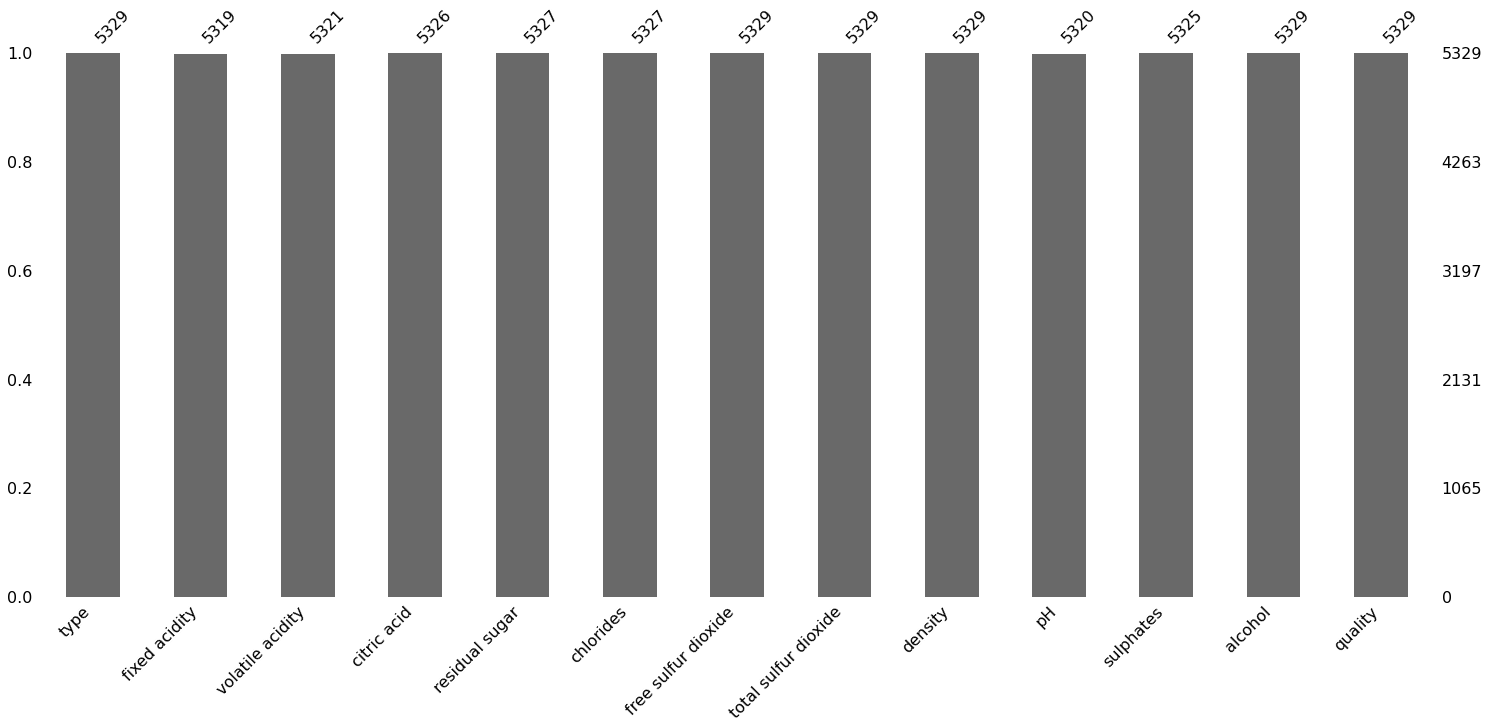

In [136]:
# Visualizing missing values
msno.bar(df)

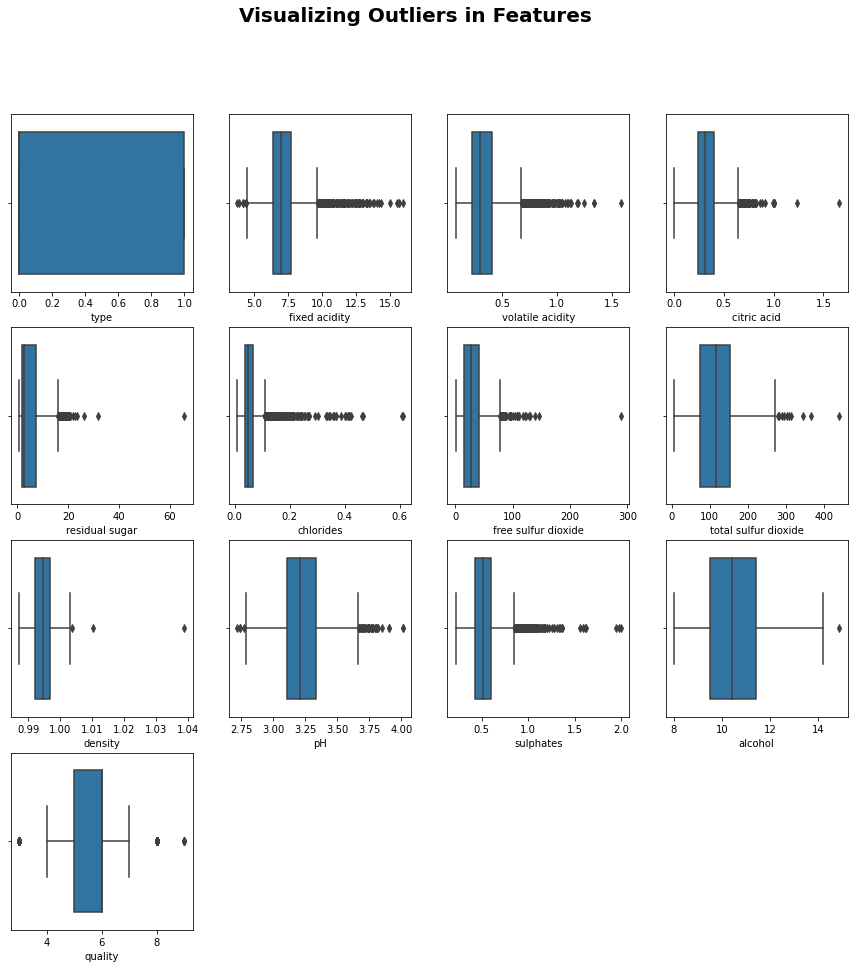

In [137]:
# checking outliers
plt.figure(figsize=(15,15))
plt.suptitle('Visualizing Outliers in Features',fontsize = 20, fontweight = 'bold')

for i in range(0,len(df.columns)):
    plt.subplot(4,4,i+1)
    sns.boxplot(x = df[df.columns[i]])

OBSERVATIONS : There are outliers in all features except the Type feature

<AxesSubplot:xlabel='quality', ylabel='count'>

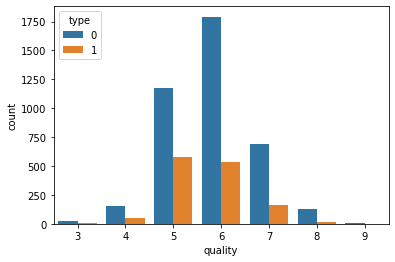

In [138]:
sns.countplot(x = df['quality'], data = df, hue = df['type'])

OBSERVATIONS : In all the quality ranges we have more number of white wines

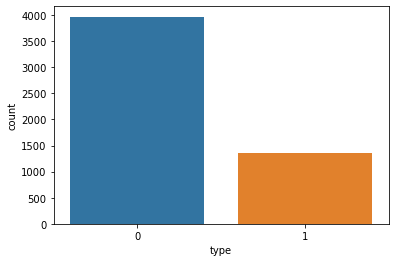

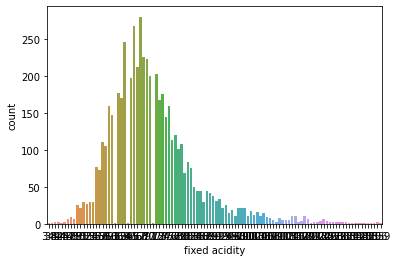

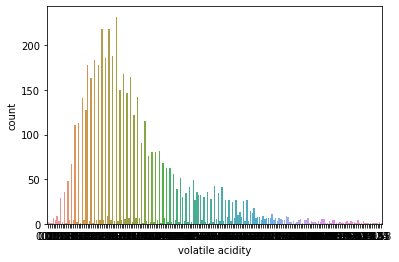

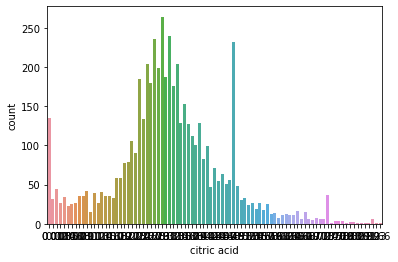

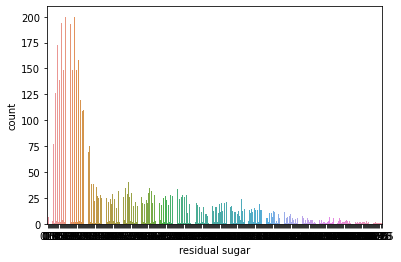

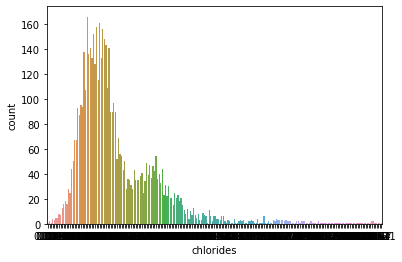

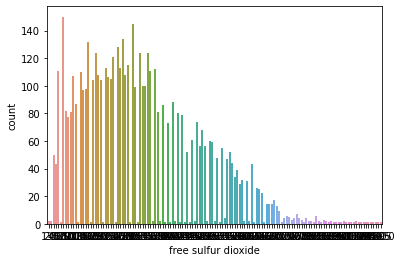

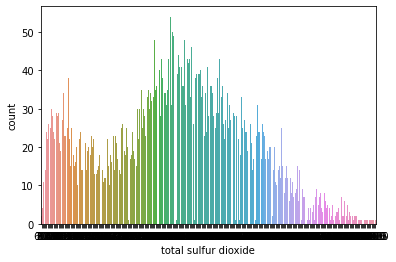

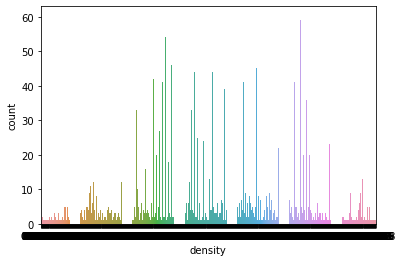

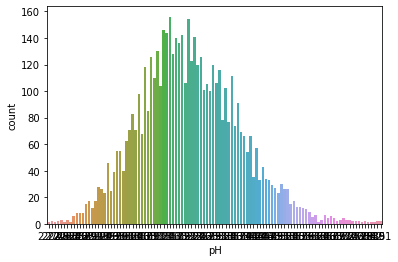

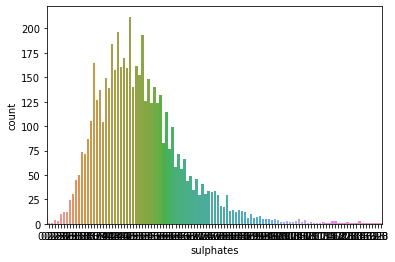

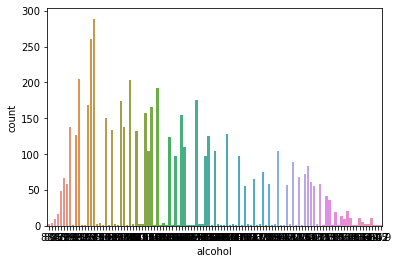

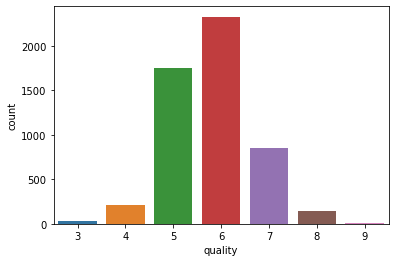

In [139]:
# univariate analysis
for col in df.columns:
    if ((df[col].dtype == 'float64') or (df[col].dtype == 'int64')):
        plt.figure()
        sns.countplot(x = col,data = df)

<AxesSubplot:>

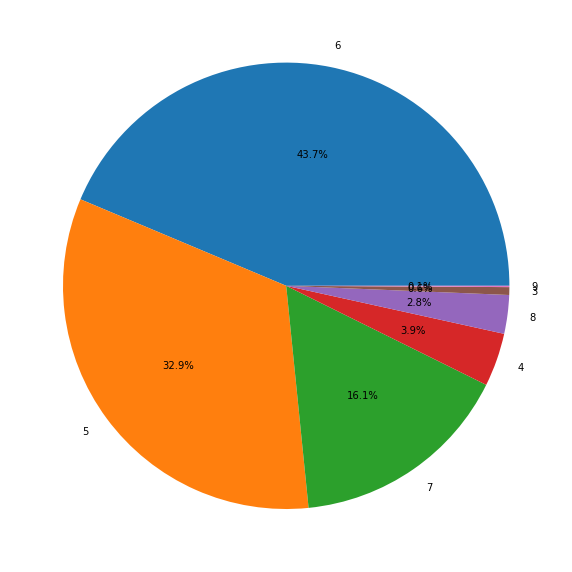

In [140]:
df['quality'].value_counts().plot.pie(figsize = (10,16),label = '',autopct = '%1.1f%%')

OBSERVATIONS : we have more wines in quality 6,5,7

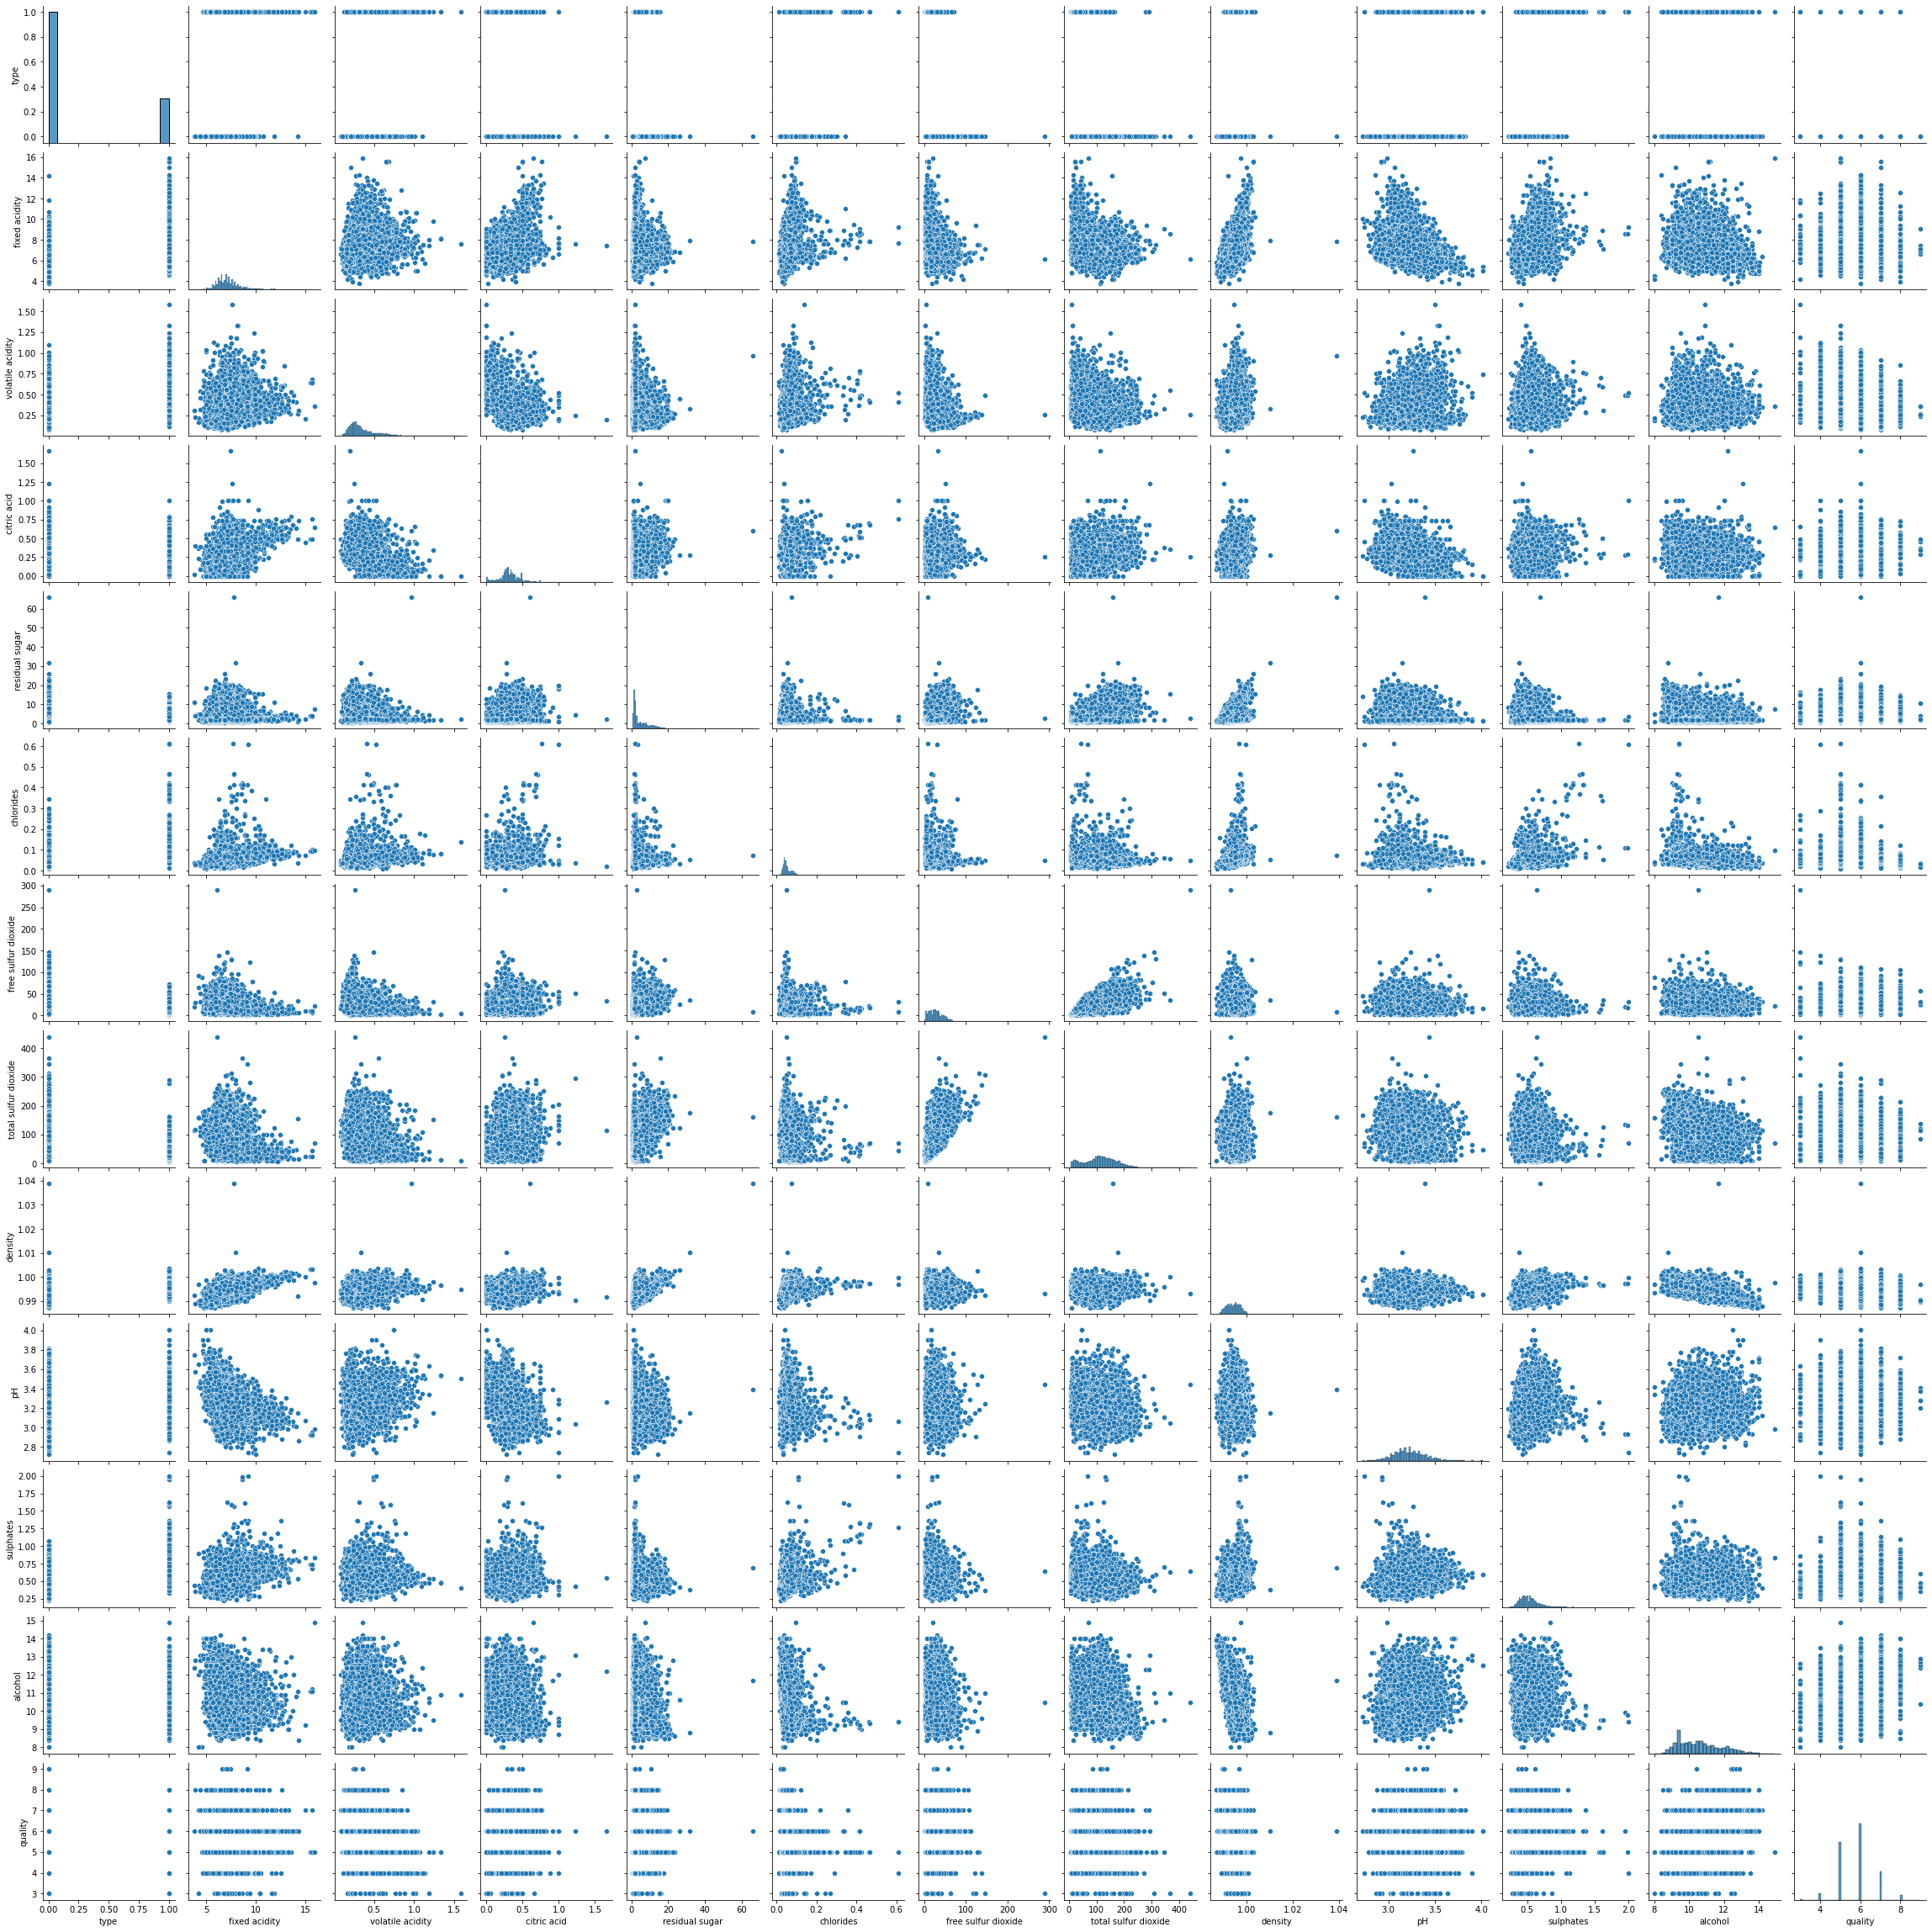

In [141]:
#multivariate analysis
sns.pairplot(df)

<AxesSubplot:>

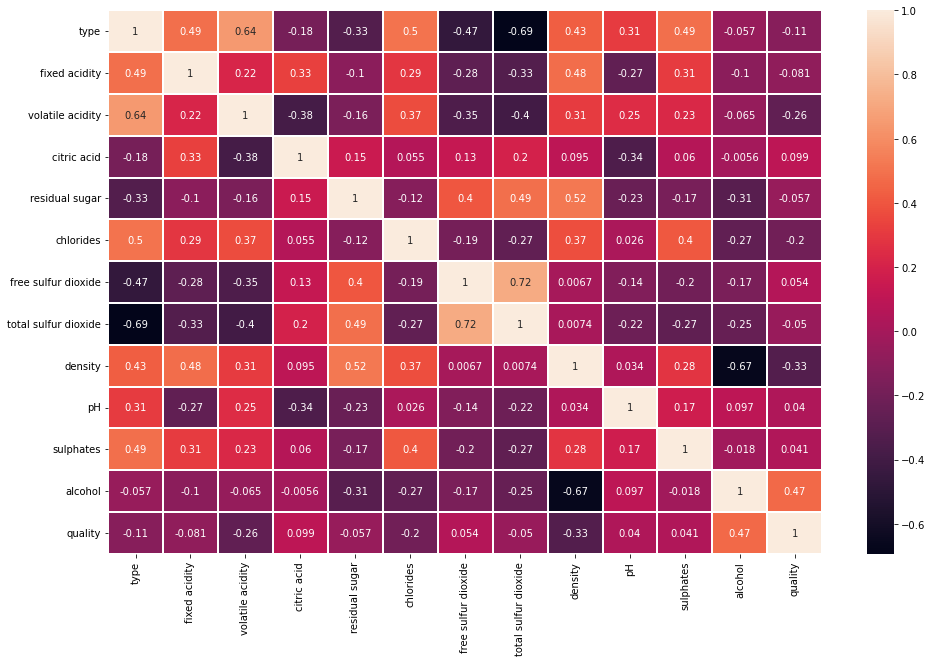

In [142]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.2)

In [143]:
# Creating def to find Correlated features
def correlation(df,threshold):
    col_cor = set()
    cor_matrix = df.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if (cor_matrix.iloc[i,j])>threshold :
                colname = cor_matrix.columns[i]
                col_cor.add(colname)
                
    return col_cor

In [144]:
corr_features = correlation(df,0.6)
len(set(corr_features))

2

In [145]:
corr_features

{'total sulfur dioxide', 'volatile acidity'}

In [146]:
df.drop(columns=['total sulfur dioxide', 'volatile acidity'],inplace=True)

# Splitting data into Train and Test

In [147]:
df.shape

(5329, 11)

In [148]:
X = df.drop(columns='quality')

In [149]:
y = df['quality']

In [150]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

In [151]:
y_train.value_counts()

6    1648
5    1211
7     601
4     149
8      95
3      23
9       3
Name: quality, dtype: int64

In [152]:
y_test.value_counts()

6    679
5    544
7    256
4     57
8     54
3      7
9      2
Name: quality, dtype: int64

In [153]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (3730, 10)
X_test (1599, 10)
y_train (3730,)
y_test (1599,)


# Feature Engineering

**Handling Missing Values**

In [154]:
X_train.isnull().sum()

type                   0
fixed acidity          8
citric acid            3
residual sugar         1
chlorides              2
free sulfur dioxide    0
density                0
pH                     5
sulphates              4
alcohol                0
dtype: int64

In [155]:
X_train['fixed acidity'] = X_train['fixed acidity'].fillna(X_train['fixed acidity'].median())
X_train['citric acid'] = X_train['citric acid'].fillna(X_train['citric acid'].median())
X_train['residual sugar'] = X_train['residual sugar'].fillna(X_train['residual sugar'].median())
X_train['chlorides'] = X_train['chlorides'].fillna(X_train['chlorides'].median())
X_train['pH'] = X_train['pH'].fillna(X_train['pH'].median())
X_train['sulphates'] = X_train['sulphates'].fillna(X_train['sulphates'].median())

In [156]:
X_test.isnull().sum()

type                   0
fixed acidity          2
citric acid            0
residual sugar         1
chlorides              0
free sulfur dioxide    0
density                0
pH                     4
sulphates              0
alcohol                0
dtype: int64

In [157]:
X_test['fixed acidity'] = X_test['fixed acidity'].fillna(X_test['fixed acidity'].median())
X_test['residual sugar'] = X_test['residual sugar'].fillna(X_test['residual sugar'].median())
X_test['pH'] = X_test['pH'].fillna(X_test['pH'].median())

In [158]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (3730, 10)
X_test (1599, 10)
y_train (3730,)
y_test (1599,)


**Handling Outliers**

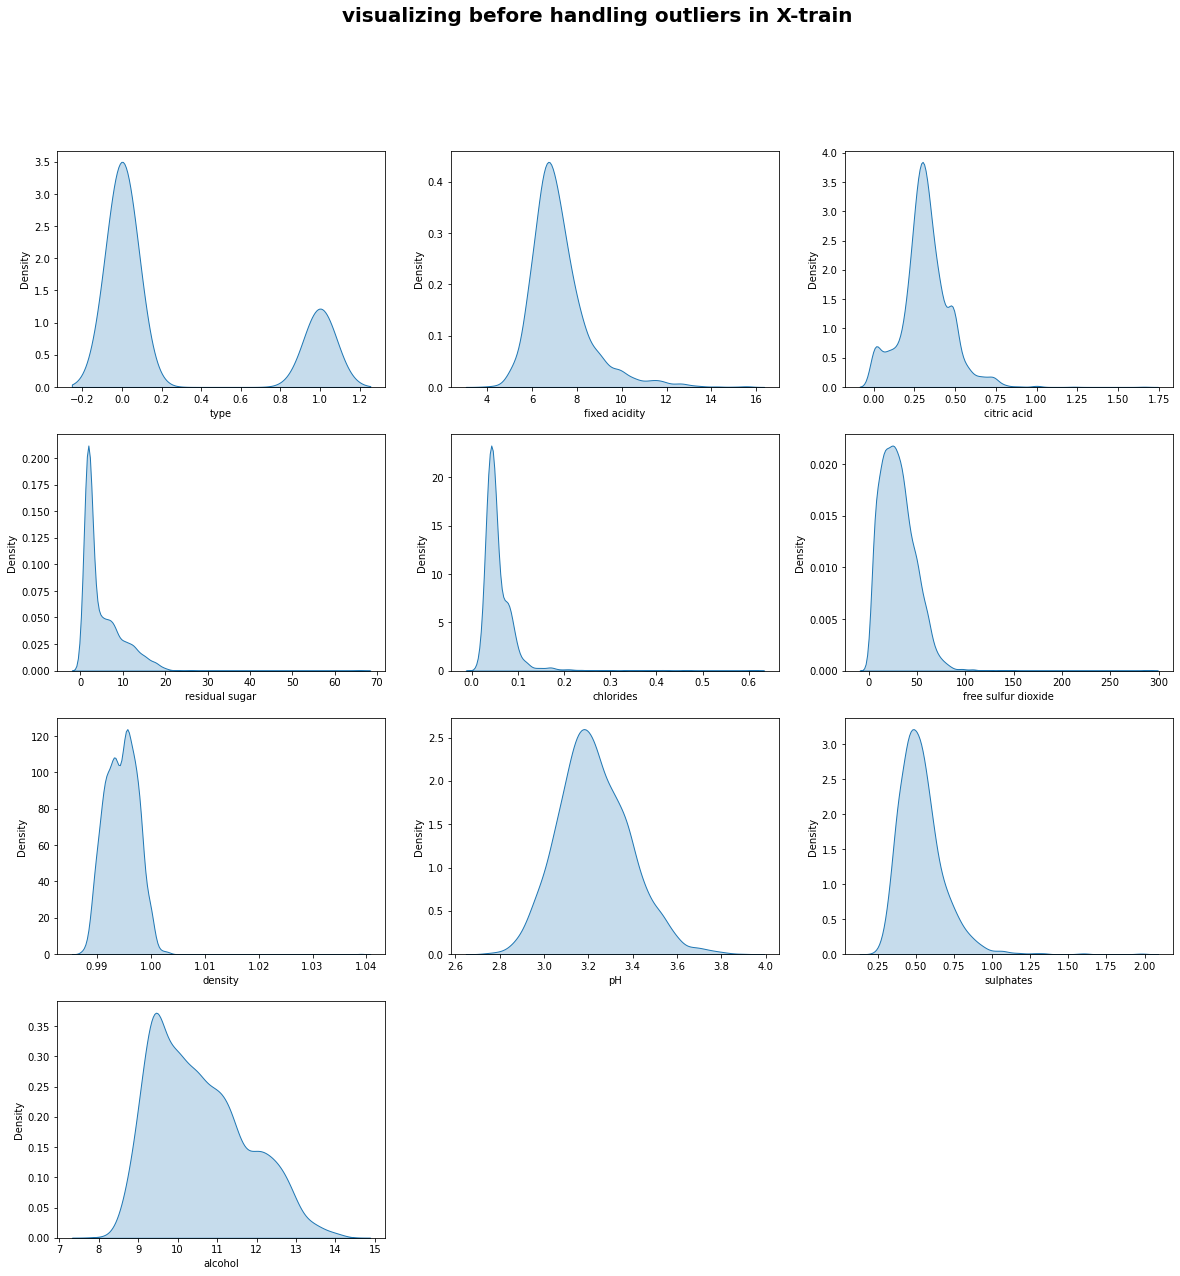

In [159]:
# visualizing before handling outliers in X-train

plt.figure(figsize=(20,20))
plt.suptitle('visualizing before handling outliers in X-train',fontsize = 20, fontweight = 'bold')

for i in range(0,len(X_train.columns)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x = X_train[X_train.columns[i]], shade=True)

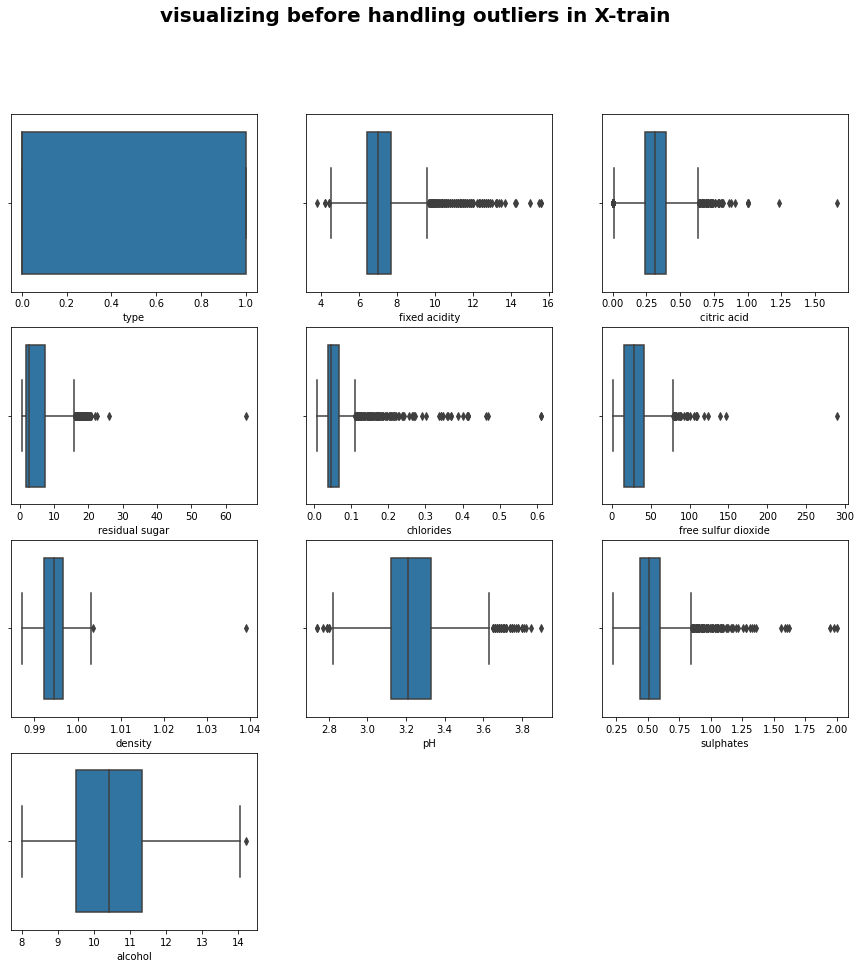

In [160]:
# checking outliers
plt.figure(figsize=(15,15))
plt.suptitle('visualizing before handling outliers in X-train',fontsize = 20, fontweight = 'bold')

for i in range(0,len(X_train.columns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x = X_train[X_train.columns[i]])

In [161]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [162]:
## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [163]:
replace_with_thresholds(X_train, X_train.columns)

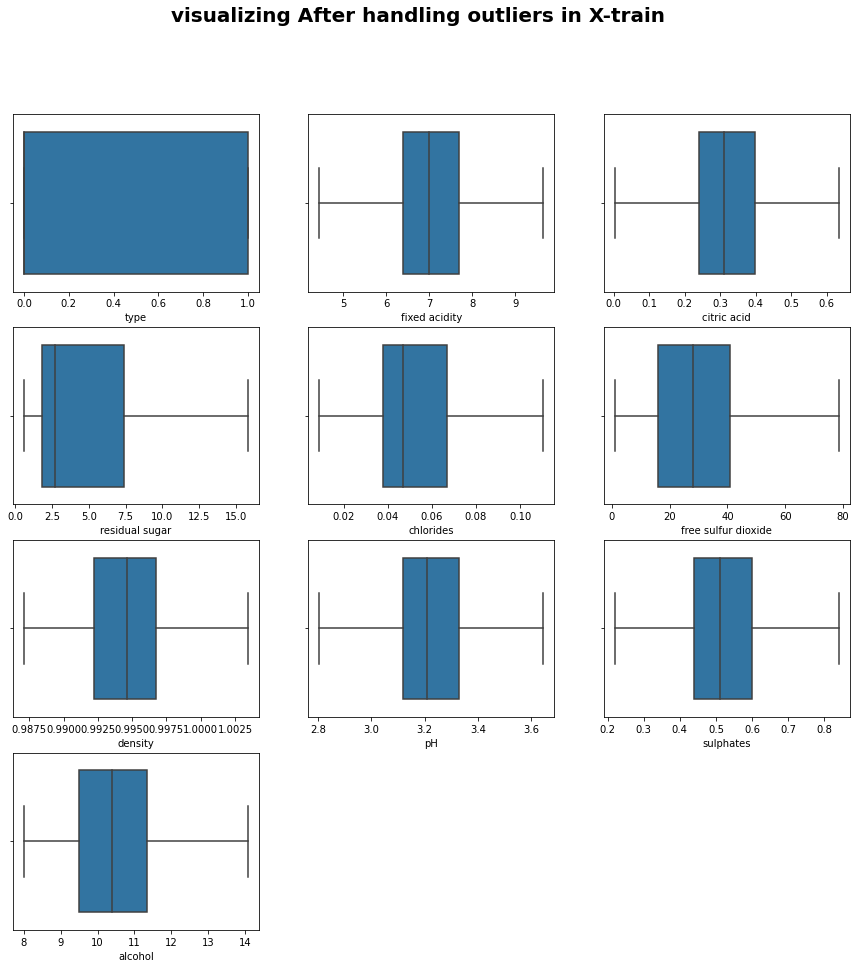

In [164]:
# checking outliers
plt.figure(figsize=(15,15))
plt.suptitle('visualizing After handling outliers in X-train',fontsize = 20, fontweight = 'bold')

for i in range(0,len(X_train.columns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x = X_train[X_train.columns[i]])

In [165]:
replace_with_thresholds(X_test, X_test.columns)

In [166]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (3730, 10)
X_test (1599, 10)
y_train (3730,)
y_test (1599,)


In [167]:
y_train = y_train.map({3:0,4:0,5:0,6:0,7:1,8:1,9:1})
y_test = y_test.map({3:0,4:0,5:0,6:0,7:1,8:1,9:1})

In [168]:
y_train.value_counts()

0    3031
1     699
Name: quality, dtype: int64

OBSERVATIONS : So we have imbalanced data and need to handle it 

In [169]:
sn = SMOTEENN(random_state=0)
sn.fit(X_train,y_train)

X_train,y_train = sn.fit_resample(X_train,y_train)

In [170]:
y_train.value_counts()

1    2380
0    1737
Name: quality, dtype: int64

In [171]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (4117, 10)
X_test (1599, 10)
y_train (4117,)
y_test (1599,)


**Scaling the features**

In [172]:
scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [173]:
X_test_scaled

array([[0.        , 0.58653846, 0.59722222, ..., 0.51785714, 0.3220339 ,
        0.32876712],
       [0.        , 0.33653846, 0.34325397, ..., 0.50595238, 0.45762712,
        0.21369863],
       [0.        , 0.45192308, 0.66071429, ..., 0.33928571, 1.02542373,
        0.47671233],
       ...,
       [0.        , 0.27884615, 0.45436508, ..., 0.38690476, 0.83050847,
        0.46027397],
       [0.        , 0.91346154, 0.2797619 , ..., 0.07738095, 1.02542373,
        0.36164384],
       [0.        , 0.47115385, 0.64484127, ..., 0.49404762, 0.49152542,
        0.49315069]])

In [174]:
X_train_scaled.shape

(4117, 10)

# Model Building

In [175]:
model=SVC()
model.fit(X_train_scaled,y_train)

SVC()

In [176]:
y_predict=model.predict(X_test_scaled)

In [177]:
y_predict

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [178]:
print("Accuracy Score of SVC:",accuracy_score(y_test,y_predict))

Accuracy Score of SVC: 0.7435897435897436


In [179]:
#GridsearchCV
parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[0.8,0.9,1,1.1,1.2,1.3,1.4]
}

In [180]:
grid = GridSearchCV(model, parameters, cv=5)

In [181]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [182]:
grid.best_params_

{'C': 1.3, 'kernel': 'poly'}

In [183]:
# creating a new SVC model with these best parameters

model2 = SVC(C = 1.3,kernel = 'poly')
model2.fit(X_train_scaled, y_train)
y_pred = model2.predict(X_test_scaled)

In [184]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1287
           1       0.40      0.70      0.51       312

    accuracy                           0.74      1599
   macro avg       0.66      0.72      0.67      1599
weighted avg       0.81      0.74      0.76      1599



In [185]:
print("Training accuracy :", model2.score(X_train_scaled, y_train))
print("Testing accuracy :", model2.score(X_test_scaled,y_test))

Training accuracy : 0.9169298032547972
Testing accuracy : 0.7373358348968105


In [186]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))

0.7373358348968105
